# Rede Neural Perceptron Multicamadas - Breast Cancer - Exercício de fixação 2

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import random
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from imblearn.under_sampling import NearMiss
#suppress warnings
warnings.filterwarnings('ignore')

### Primeiras impressões do conjunto de dados

##### Carregamento e informações

In [79]:
#Lendo o conjunto de dados
df = pd.read_csv('dataset/entradas_breast.csv')
df['Class'] = pd.read_csv('dataset/saidas_breast.csv')

#visualizando aleatoriamente 5 registros do conjunto de dados
df.sample(5).sort_index()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Class
30,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,...,34.01,160.50,1670.0,0.1491,0.42570,0.61330,0.18480,0.3444,0.09782,0
241,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,0.1546,0.05754,...,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783,1
258,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,0.08104,...,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190,0
391,8734.00,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,...,22.80,64.01,317.0,146.0000,131.00000,0.00000,0.00000,0.2445,0.08865,1
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.02783,21.00000,0.1601,0.05913,...,36.32,85.07,521.3,0.1453,0.16220,0.18110,0.08698,0.2973,0.07745,1


In [80]:
#Informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [81]:
#Informações das variáveis
df.describe(include='all').loc[['min','max']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Class
min,7.76,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.1167,0.04996,...,12.02,50.41,185.2,0.07117,0.02729,0.0,0.0,0.1565,0.05504,0.0
max,9904.00,39.28,188.50,2501.0,123.00000,277.00000,313.0,162.0,304.0000,78.00000,...,49.54,251.20,4254.0,185.00000,1058.00000,1252.0,291.0,544.0000,173.00000,1.0


In [82]:
#Verificando a existência de valores ausentes(missing)
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Class                      0
dtype: int64

##### Heatmap

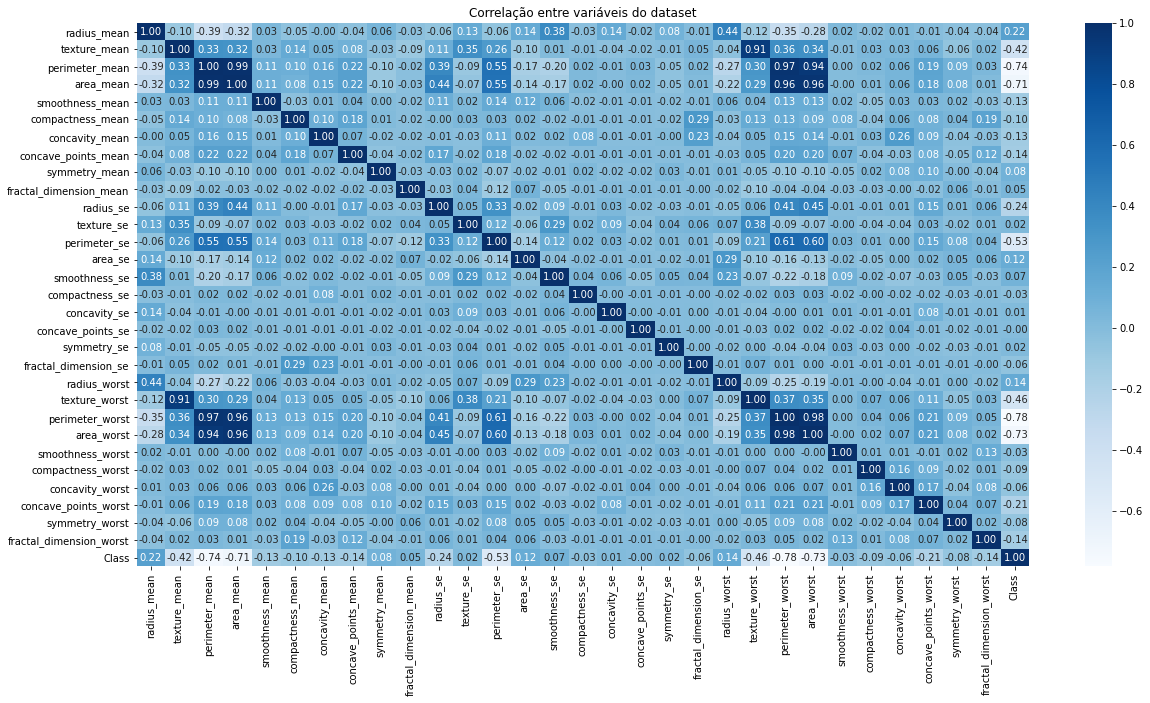

In [83]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

##### Boxplot

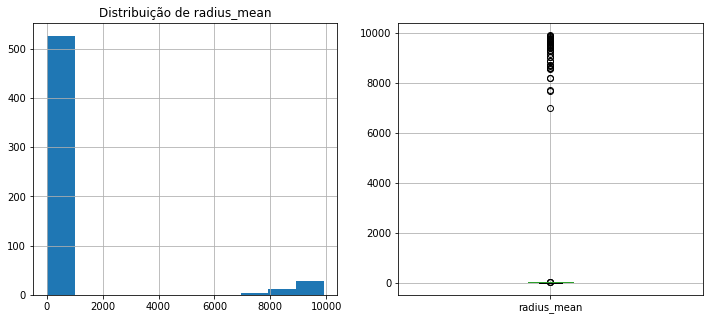

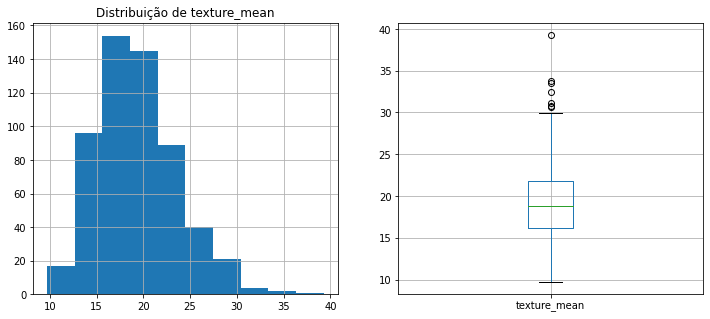

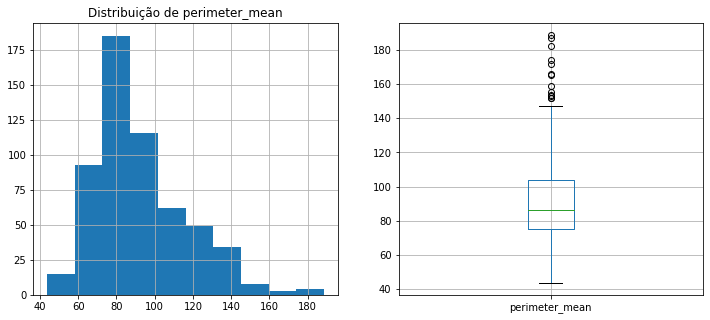

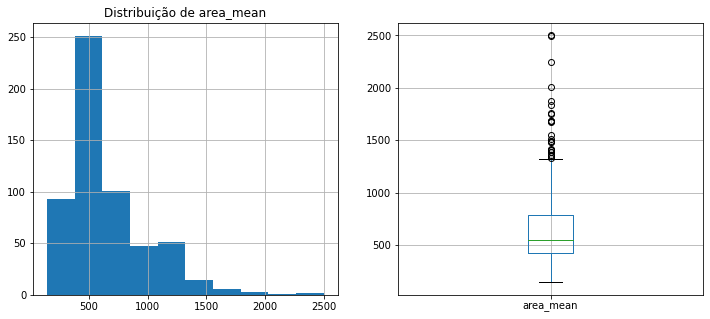

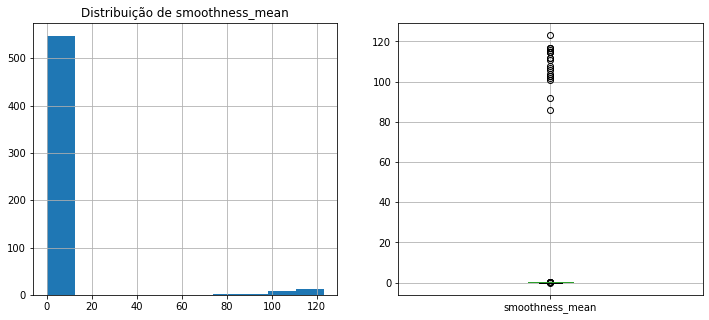

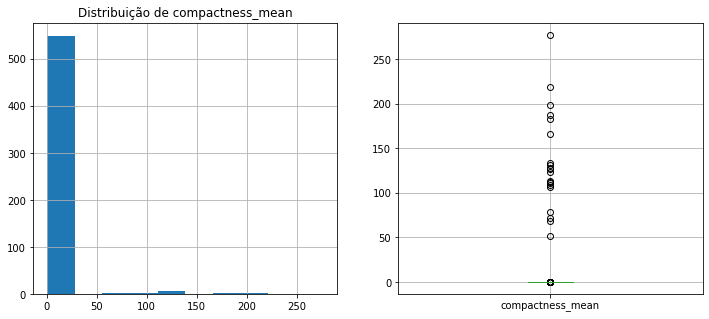

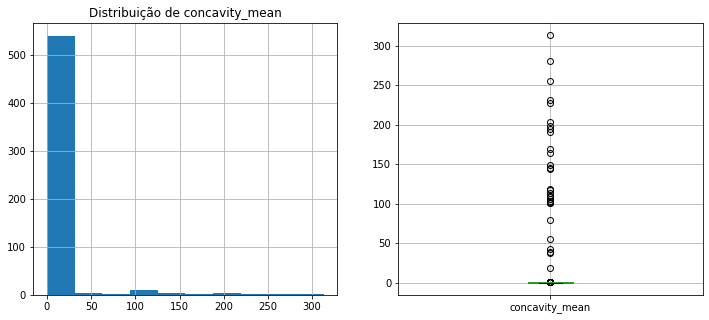

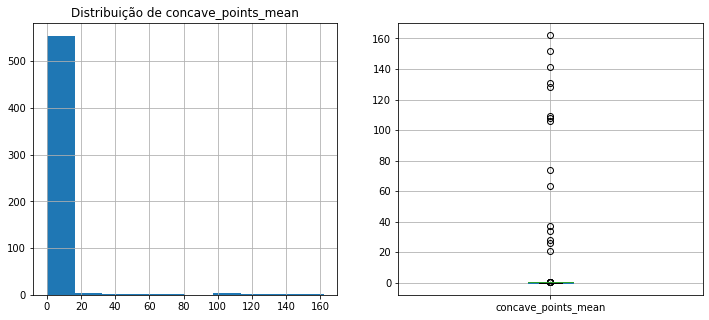

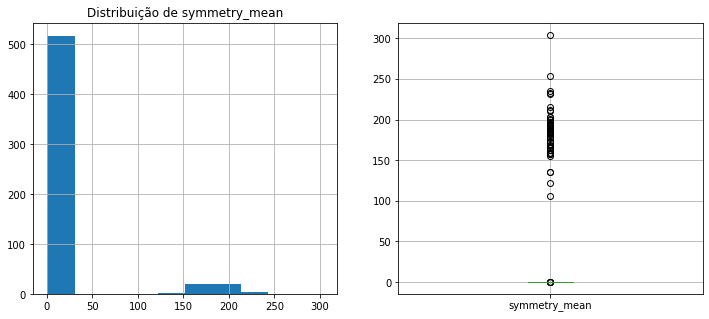

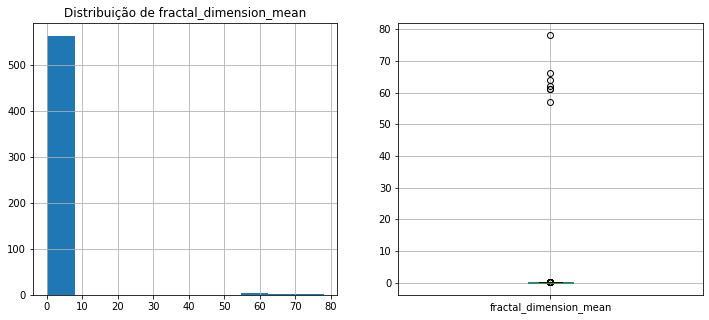

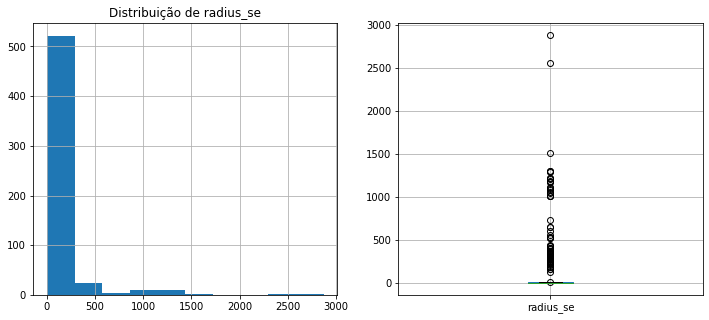

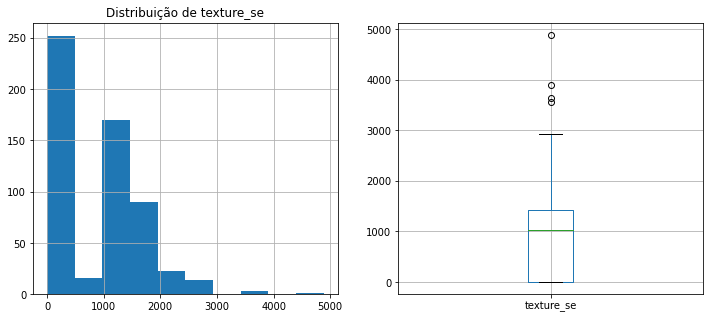

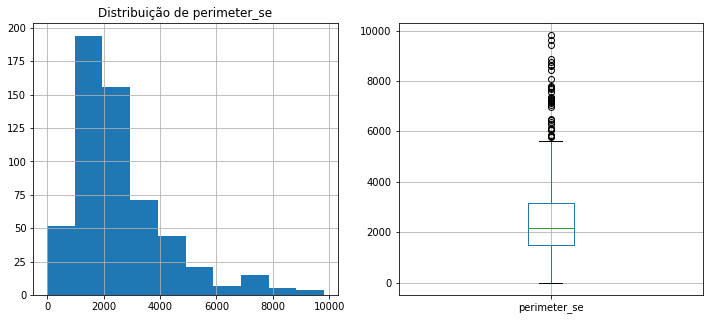

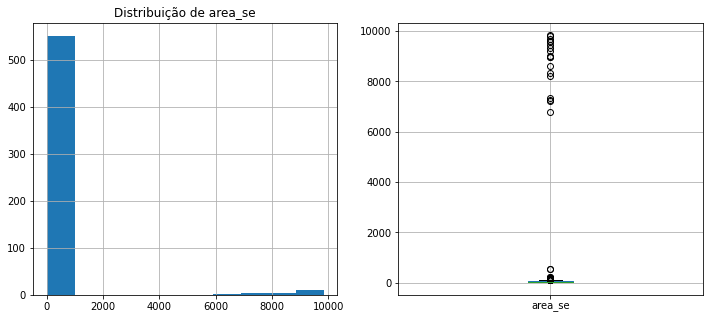

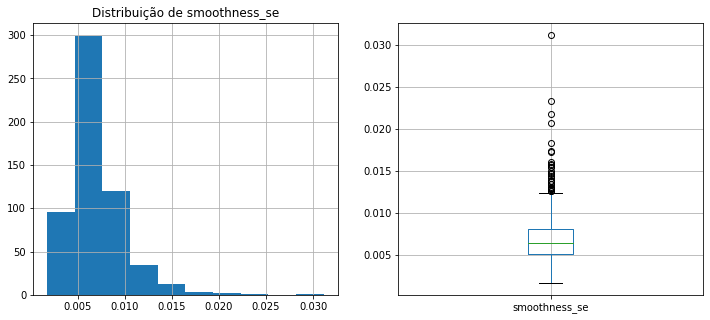

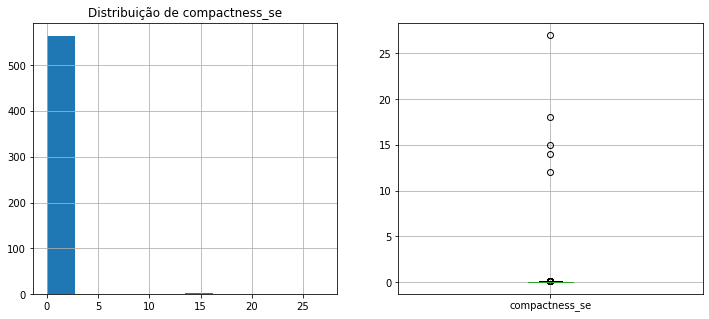

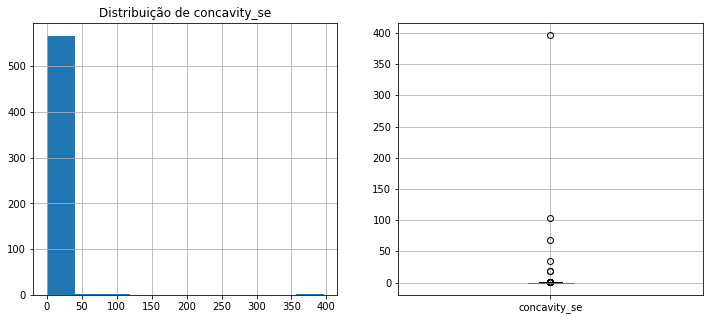

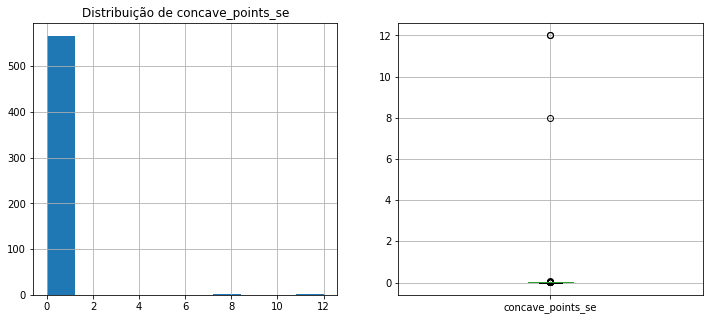

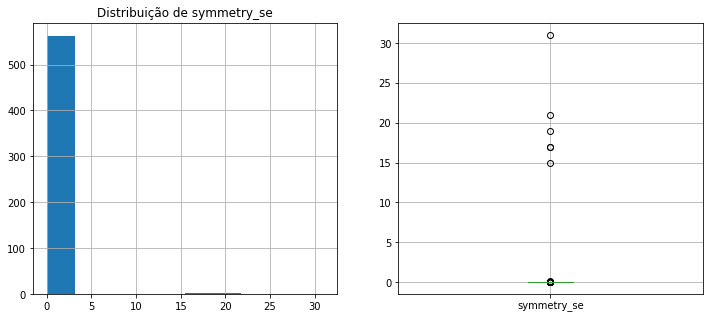

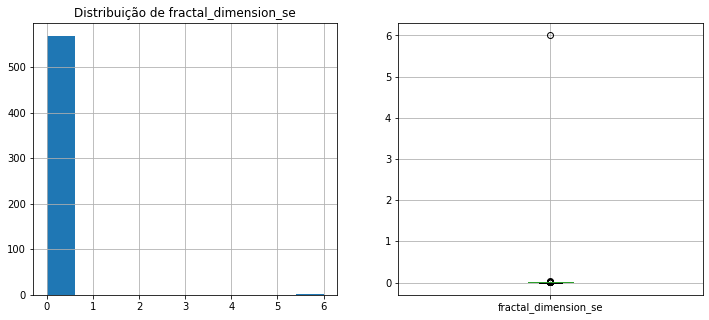

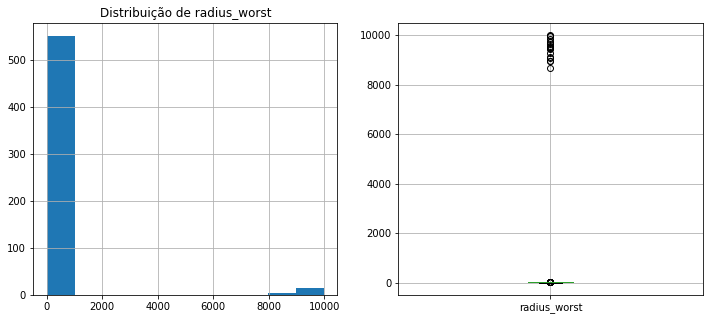

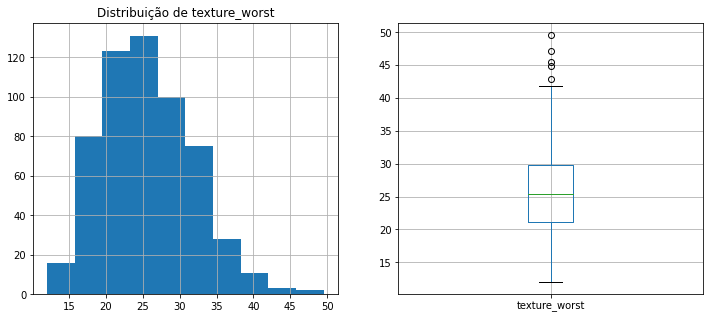

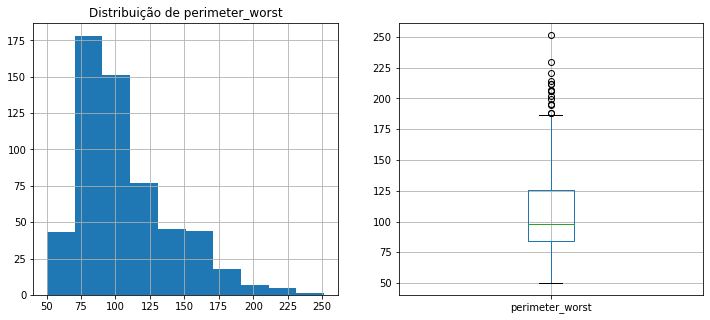

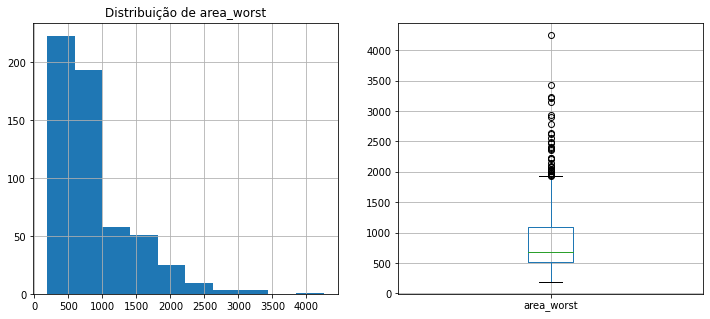

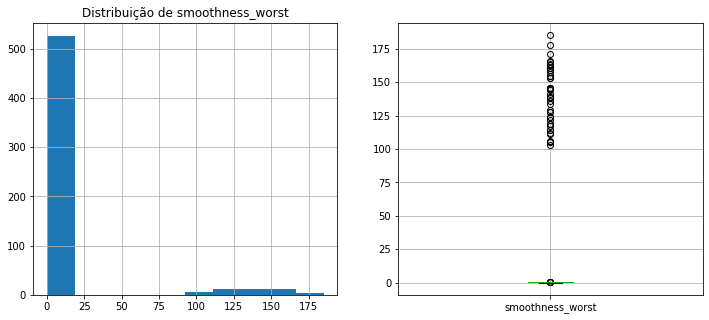

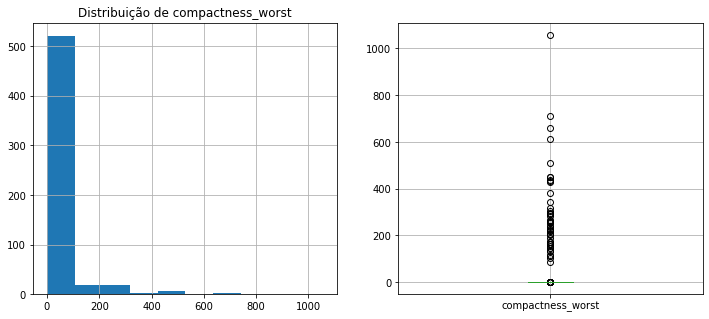

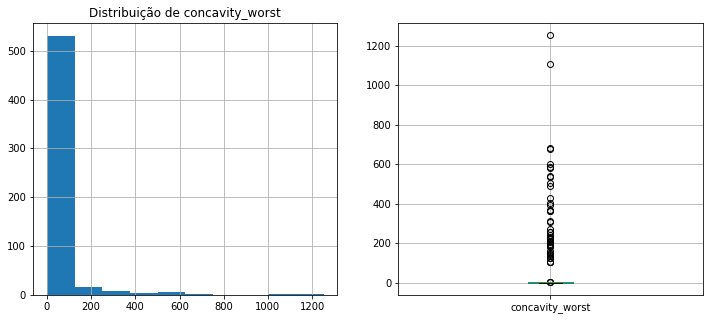

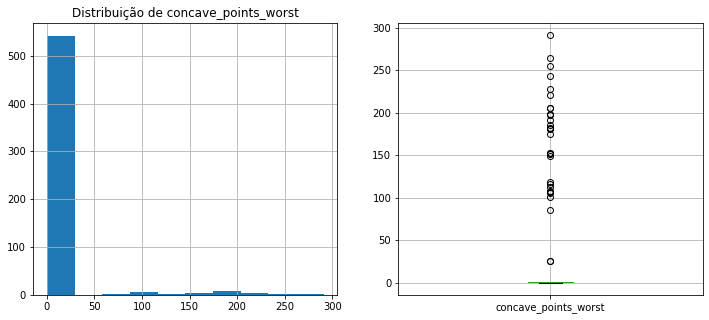

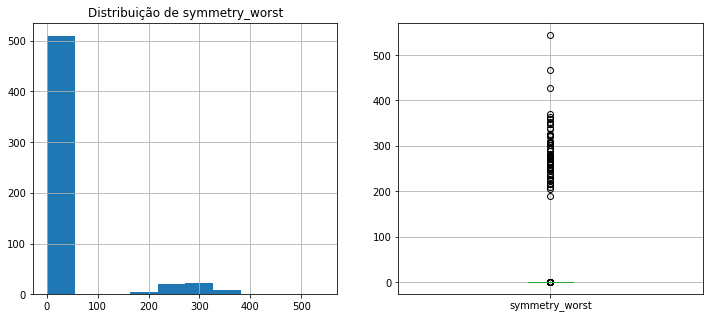

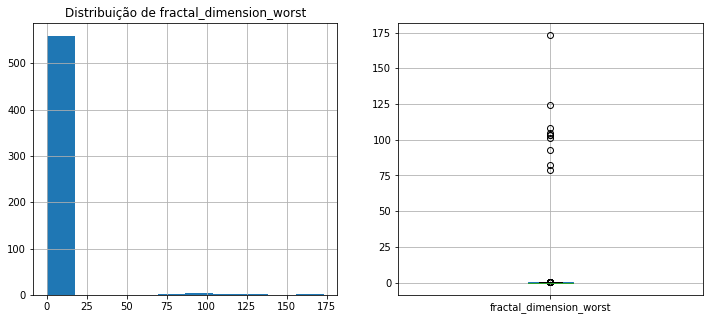

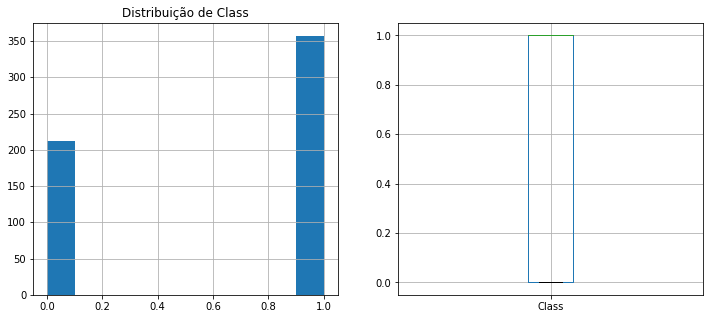

In [84]:
#Exibição do histograma da distribuição dos dados para identificar outliers
for col in df.columns:
    f, axes = plt.subplots(1,2, figsize = (12,5))
    df[col].hist(bins = 10, ax = axes[0])
    axes[0].set_title("Distribuição de "+ col)
    df.boxplot(column=col, ax = axes[1])
    plt.show()

### Pré processamento dos dados

#### Remoção de outlier

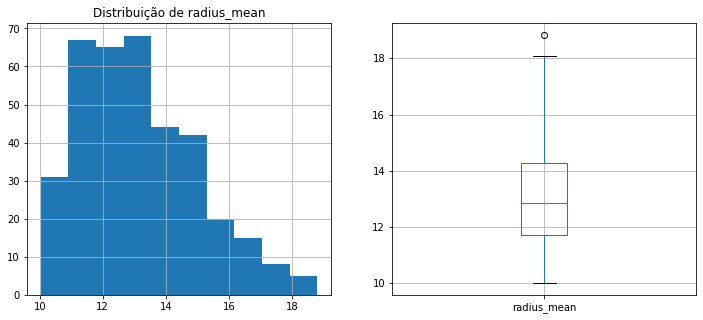

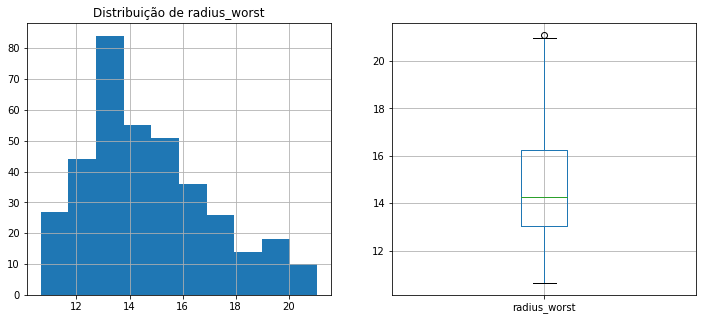

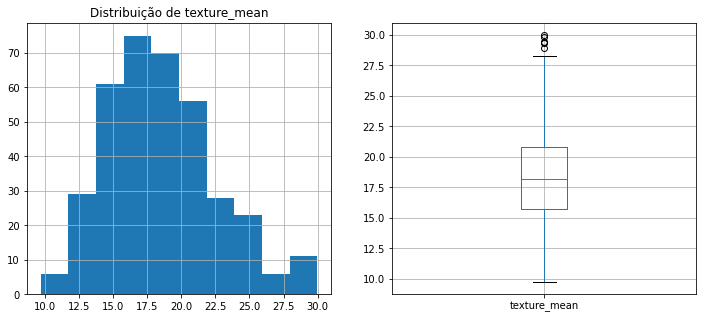

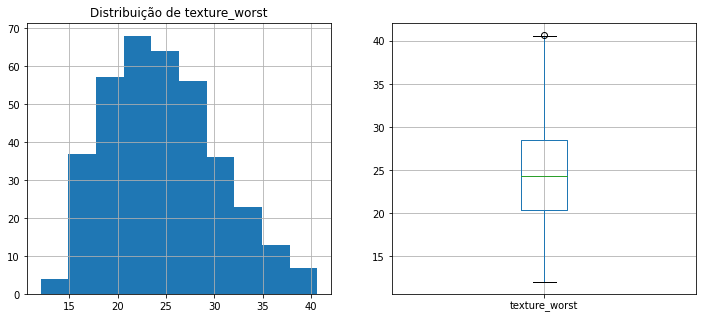

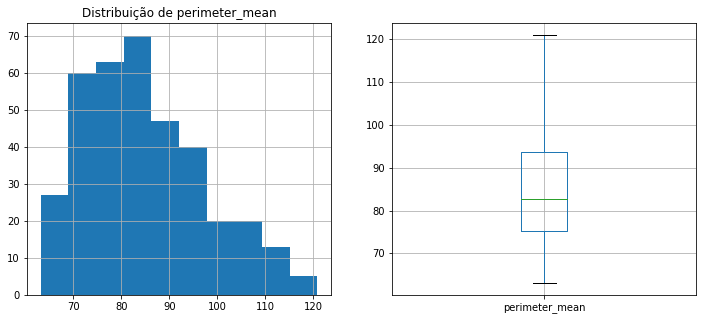

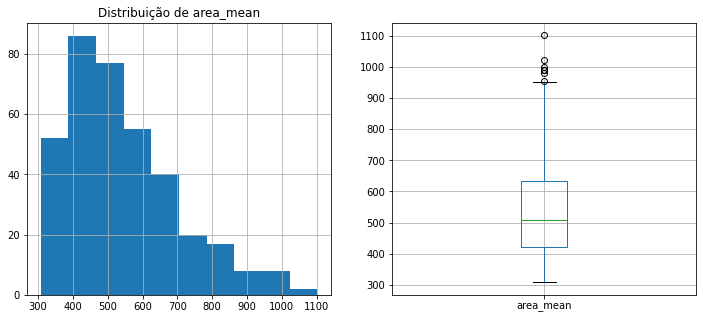

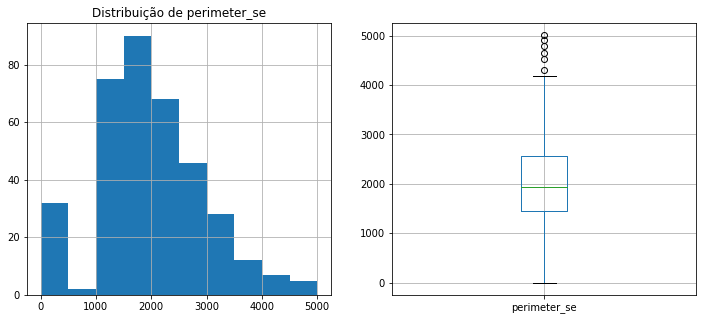

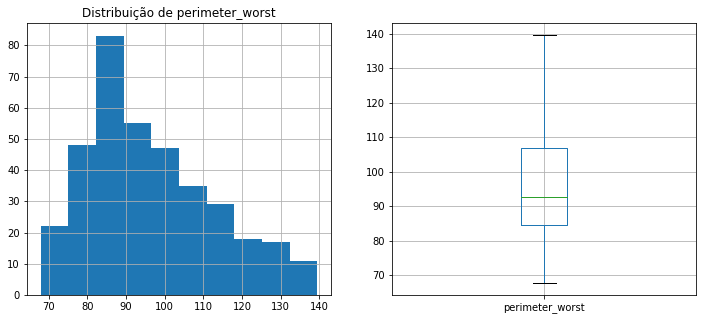

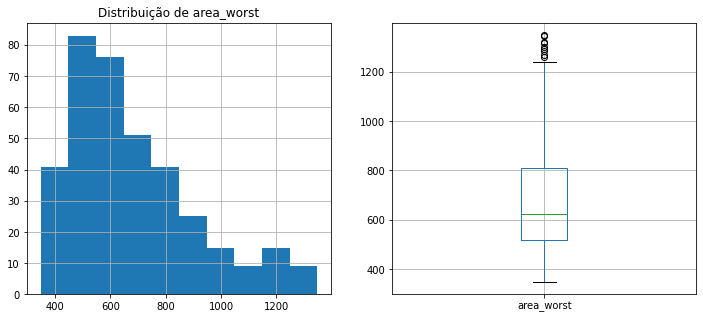

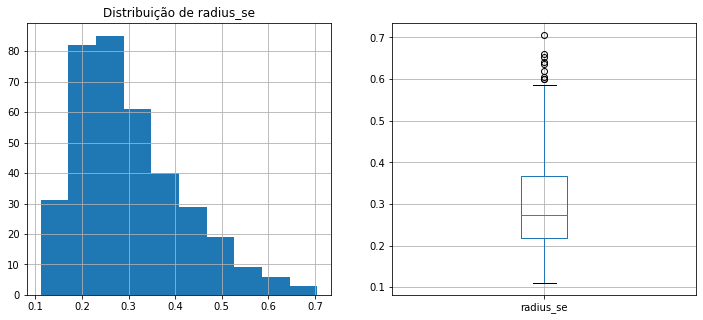

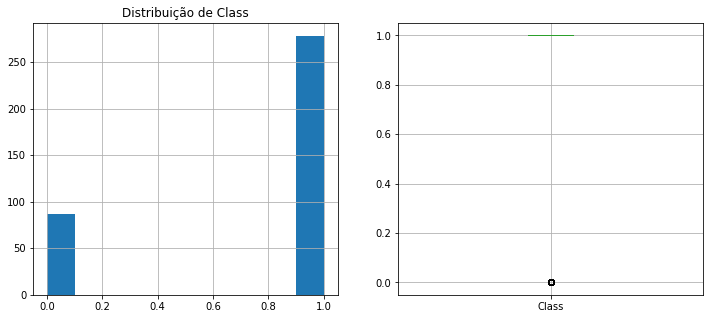

In [85]:
#Selecionando as variáveis com correlação maior que 0.4
def selecionar_correlacoes(df, min):
    corr_list = []
    corr_var = []
    for col in df.columns:
        for col2 in df.columns:
            if col != col2:
                corr = df[col].corr(df[col2])
                if corr > min:
                    corr_list.append([col, col2])
    for a in corr_list:
        for b in corr_list:
            if a[0] == b[1] and a[1] == b[0]:
                corr_list.remove(b)
    for a in corr_list:
        if a[0] not in corr_var:
            corr_var.append(a[0])
        if a[1] not in corr_var:
            corr_var.append(a[1])
    #print(f'\nVariáveis com correlação maior que {min}: \n{corr_var}')
    #corr_var.append('class')
    return corr_var
    
#remoção automática de outliers nas colunas listadas em corr_var de df
def remover_outliers(df, corr_var):
    for col in corr_var:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

corr_var = selecionar_correlacoes(df, 0.4)
df_norm = remover_outliers(df.copy(), corr_var)
corr_var.append('Class')

# exibição do grafica da distribuição dos dados
for col in corr_var:
    f, axes = plt.subplots(1,2, figsize = (12,5))
    df_norm[col].hist(bins = 10, ax = axes[0])
    axes[0].set_title("Distribuição de "+ col)
    df_norm.boxplot(column=col, ax = axes[1])
    plt.show()

#### Seleção de features promissoras

In [86]:
#Remoção das variáveis com baixa correlação 
for col in df_norm.columns:
    if col not in corr_var:
        df_norm = df_norm.drop(col, axis=1)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 3 to 566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   radius_mean      365 non-null    float64
 1   texture_mean     365 non-null    float64
 2   perimeter_mean   365 non-null    float64
 3   area_mean        365 non-null    float64
 4   radius_se        365 non-null    float64
 5   perimeter_se     365 non-null    float64
 6   radius_worst     365 non-null    float64
 7   texture_worst    365 non-null    float64
 8   perimeter_worst  365 non-null    float64
 9   area_worst       365 non-null    float64
 10  Class            365 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 34.2 KB


#### Balanceamento

<AxesSubplot:xlabel='Class', ylabel='count'>

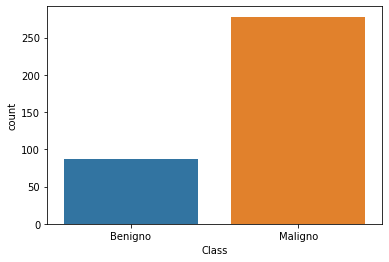

In [87]:
#Verificando o balanceamento da variável de decisão
df_cat = df_norm.copy()
df_cat['Class'] = pd.cut(df_cat['Class'], 2, labels = ['Benigno','Maligno'])
sns.countplot(x='Class', data=df_cat)

In [ ]:
#Realizando o undersampling para reduzir o número de registros de Pele
X = df.values[:, :-1]
y = df.values[:, -1]
nr = NearMiss()
X, y = nr.fit_resample(X, y)
df = pd.DataFrame(X, columns=df.columns[:-1])
df['Class'] = y
df_cat = df.copy()
df_cat['Class'] = pd.cut(df_cat['Class'], 2, labels = ['Benigno','Maligno'])
sns.countplot(x='Class', data=df_cat)
plt.title('Distribuição de classes')

### Função de Ativação

In [88]:
def sigmoid(u):
    return 1.0 / (1.0 + np.exp(-u))

### Método de inicialização de pesos

In [89]:
def aleatorio(n_entrada, n_oculta, n_saida):
    random.seed(30)
    w1 = np.zeros((n_entrada, n_oculta))
    w2 = np.zeros((n_oculta, n_saida))
    for i in range(0, n_entrada):
        for j in range(1, n_oculta):
            aleatorio = random.randint(1, 101)
            w1[i,j] = (1.0 - 2.0 * aleatorio) / 100.0
    for j in range(0, n_oculta):
        for k in range(0, n_saida):
            aleatorio = random.randint(1, 101)
            w2[j,k] = (1.0 - 2.0 * aleatorio) / 100.0
    return w1, w2

def uniforme(n_entrada, n_oculta, n_saida):
    w1 = np.random.uniform(-1, 1, (n_entrada, n_oculta))
    w2 = np.random.uniform(-1, 1, (n_oculta, n_saida))
    return w1, w2

def normal(n_entrada, n_oculta, n_saida):
    w1 = np.random.normal(0, 1, (n_entrada, n_oculta))
    w2 = np.random.normal(0, 1, (n_oculta, n_saida))
    return w1, w2

def zero(n_entrada, n_oculta, n_saida):
    w1 = np.zeros((n_entrada, n_oculta))
    w2 = np.zeros((n_oculta, n_saida))
    return w1, w2

### Classe Percetron Multicamada 3C

In [90]:
class MLP3C:
    def __init__(self, n_entrada, n_oculta, n_saida, inicializa_pesos, funcao_ativacao, nome_dt):
        self.n_entrada = n_entrada
        self.n_oculta = n_oculta
        self.n_saida = n_saida
        self.inicializa_pesos = inicializa_pesos
        self.w1 = self.w2 = np.array([])
        self.delta1 = self.delta2 = np.array([])
        self.funcao_ativacao = funcao_ativacao
        self.nome_dt = nome_dt
        self.erro_max = 0.0
        self.epocas = 0
        self.qtd_acertos = 0
        #self.bias = 1.0

    def intermediaria(self, x):
        h = np.zeros(self.n_oculta)
        h[0] = 1.0
        for j in range(1, self.n_oculta):
            somatorio = 0.0
            for i in range(0, self.n_entrada):
                somatorio = somatorio + x[i] * self.w1[i,j]
            h[j] = self.funcao_ativacao(somatorio)
        return h
    
    def saida(self, h):
        o = np.zeros(self.n_saida)
        for j in range(0, self.n_saida):
            somatorio = 0.0
            for i in range(0, self.n_oculta):
                somatorio = somatorio + h[i] * self.w2[i,j]
            o[j] = self.funcao_ativacao(somatorio)
        return o

    def erro_saida(self, o, y):
        somatorio = 0.0
        y = [y]
        for i in range(self.n_saida):
            somatorio = somatorio + (o[i] - y[i])*(o[i] - y[i])
        erro = 0.5 * somatorio
        return erro

    def erro2(self, o, y):
        y = [y]
        delta2 = np.zeros(self.n_saida)
        for i in range(self.n_saida):
            delta2[i] = o[i] * (1.0 - o[i]) * (y[i] - o[i])
        return delta2
   
    def erro1(self, h, delta2):
        delta1 = np.zeros(self.n_oculta)
        for i in range(1, self.n_oculta):
            somatorio = 0.0
            for j in range(0, self.n_saida):
                somatorio = somatorio + self.w2[i][j] * delta2[j]
            delta1[i] = h[i] * (1.0 - h[i]) * somatorio
        return delta1

    def ajusta2(self, h, eta):
        for i in range(self.n_oculta):
            for j in range(self.n_saida):
                self.w2[i][j] = self.w2[i][j] + eta * self.delta2[j] * h[i]
        
    def ajusta1(self, x, eta):
        for i in range(self.n_entrada):
            for j in range(1, self.n_oculta):
                self.w1[i][j] = self.w1[i][j] + eta * self.delta1[j] * x[i]

    def treinar(self, X, Y, eta, max_interacoes, erro_aceitavel, verbose=True):
        self.w1, self.w2 = self.inicializa_pesos(self.n_entrada, self.n_oculta, self.n_saida)
        erro_max = erro_aceitavel * 2.0
        erros = np.ones(len(X))
        i, m = 1, 0

        while erro_max > erro_aceitavel and i <= max_interacoes:
            if m == len(X): m = 0; erros = np.ones(len(X))
            x = X[m]
            y = Y[m]
            h = self.intermediaria(x)
            o = self.saida(h)
            erro_saida = self.erro_saida(o, y)
            self.delta2 = self.erro2(o, y)
            self.delta1 = self.erro1(h, self.delta2)
            self.ajusta2(h, eta)
            self.ajusta1(x, eta)
            #mostrar épocas do processo de treinamento
            if verbose:
                print(f'Época: {i} - Padrão>> {m+1} - Erro: {erro_saida:.9f}')
            
            #if erro_saida > erro_max: erro_max = erro_saida
            if erro_saida < erro_aceitavel:
                erros[m] = erro_saida
            if m == len(X)-1:
                erro_max = np.sum(erros)/len(X)
            i += 1
            m += 1
        
        self.erro_max = erro_max
        self.epocas = i - 1
        print(f'Épocas executadas: {i-1}')
        print(f'Menor erro durante o treino: {self.erro_max:.9f}')

        if verbose:
            print(f'\nTestando com os mesmos padrões usados no treinamento...')
            emq, acuracia = self.testar(X, Y)
            print(f'EMQ com os dados de treinamento: {emq:.9f}')
            print(f'Acurácia com os dados de treinamento: {acuracia:.2f}%')

    def testar(self, X, Y, verbose=False):
        Y_obtido = []
        erro_saida = []
        emq = 0.0
        for m in range(len(X)):
            x = X[m]
            y = Y[m]
            h = self.intermediaria(x)
            o = self.saida(h)
            erro_saida.append(self.erro_saida(o, y))
            o_9 = [f'{y:.9f}' for y in o]
            if verbose:
                print(f'Padrão>> {m+1} - Calculado: {o_9[0]}, Desejado: {y}, Erro: {erro_saida[-1]:.9f}')
            Y_obtido.append(o)
            
        emq = np.sum(erro_saida) / len(X) # calcula a média dos erros quadrático médio
        qtd_acertos, acuracia = self.avaliar(Y_obtido, Y, erro_saida)
        self.qtd_acertos = qtd_acertos
        
        if verbose:
            print(f'\nErro Médio Quadrático do teste: {emq:.9f}')
            print(f'Classificações certas:  {qtd_acertos}')
            print(f'Classificações erradas: {len(X)-qtd_acertos}')
            print(f'Acurácia do teste: {acuracia:.2f}%')
            df_w1 = pd.DataFrame(self.w1[:,1:], columns=['w1_h'+str(i) for i in range(1, self.n_oculta)], index=['entrada_'+str(i) for i in range(self.n_entrada)])
            #print(f'\nPesos Entrada/Oculta:')
            #display(df_w1)
            df_w2 = pd.DataFrame(self.w2, columns=['w2_o'+str(i) for i in range(self.n_saida)], index=['h_'+str(i) for i in range(self.n_oculta)])
            #print(f'Pesos Oculta/Saida:')
            #display(df_w2)
            
            Y_obtido_9 = [f'{y[0]:.9f}' for y in Y_obtido]
            with open('resultados/resultado_' + self.nome_dt + '_3C.txt', 'w') as arquivo:
                arquivo.write(f'Cenário experimental com 3 camadas: {self.nome_dt}\n')
                for i in range(len(erro_saida)):
                    arquivo.write(f'\nPadrão>> {i+1} - Calculado: {Y_obtido_9[i]}, Desejado: {Y[i]}, Erro: {erro_saida[i]:.9f}')
                arquivo.write(f'\n\nErro Médio Quadrático: {emq:.9f}')
                arquivo.write(f'\n\nAcurácia: {acuracia:.2f}%')
                arquivo.write(f'\n\nPesos Entrada/Oculta:\n\n')
                arquivo.write(df_w1.to_string())
                arquivo.write(f'\n\nPesos Oculta/Saida:\n\n')
                arquivo.write(df_w2.to_string())

        return emq, acuracia

    # Acurácia por aproximação
    def avaliar(self, Y_obtido, Y, erros):
        qtd_acertos = erro_total = 0
        for i in range(len(Y_obtido)):
            if Y[i] == 0.0 and Y_obtido[i] >= 0.0 and Y_obtido[i] < 0.5:
                qtd_acertos += 1
                #erro_total += erros[i]
            elif Y[i] == 1.0 and Y_obtido[i] >= 0.5 and Y_obtido[i] <= 1.0:
                qtd_acertos += 1
                #erro_total += erros[i]
        acuracia = (qtd_acertos / len(Y_obtido)) * 100
        return qtd_acertos, acuracia

### Métodos de divisão do dataset

In [91]:
def hold_out_split(df, train_size):
    df_norm = df.copy()
    dataset = df_norm.values

    #escolha aleatoria dos registros para treino e teste com balanceamento
    train, test = train_test_split(dataset, train_size=train_size)

    ##escolha aleatoria dos registros sem balanceamento
    '''np.random.seed(30)
    permutation = np.random.permutation(len(dataset))
    parcela = int(train_size*len(dataset))
    train_index = permutation[:parcela]
    test_index = permutation[parcela:]'''

    bias = 1.0
    x_train = np.insert(train[:, :-1], 0, bias, axis=1)
    y_train = train[:, -1]
    x_test = np.insert(test[:, :-1], 0, bias, axis=1)
    y_test = test[:, -1]
    return x_train, y_train, x_test, y_test

### Caso 01 - HOLD OUT

#### Em modelo próprio não normalizado

In [92]:
n_entrada = len(df.columns)   # Número de entradas + bias
n_oculta = len(df.columns)    # Número de neurônios na camada oculta + bias
n_saida = 1                   # Número de neurônios na camada de saída
tx_aprend = 0.09
max_interacoes = 5000
erro_aceitavel = 0.0001
p_treino = 0.75
x_treino, y_treino, x_teste, y_teste = hold_out_split(df, p_treino)

print(f'Tamanho do conjunto>> Treino:{len(y_treino)} - Teste:{len(y_teste)}')

rede = MLP3C(n_entrada, n_oculta, n_saida, normal, sigmoid, 'Breast_Cancer')
#aleatorio - 62%, normal - 67%
rede.treinar(x_treino, y_treino, tx_aprend, max_interacoes, erro_aceitavel, verbose=True)
print(f'')
emq, acc = rede.testar(x_teste, y_teste, verbose=True)

Tamanho do conjunto>> Treino:426 - Teste:143
Época: 1 - Padrão>> 1 - Erro: 0.000189462
Época: 2 - Padrão>> 2 - Erro: 0.420724636
Época: 3 - Padrão>> 3 - Erro: 0.025458602
Época: 4 - Padrão>> 4 - Erro: 0.000111888
Época: 5 - Padrão>> 5 - Erro: 0.039661451
Época: 6 - Padrão>> 6 - Erro: 0.000203649
Época: 7 - Padrão>> 7 - Erro: 0.000203181
Época: 8 - Padrão>> 8 - Erro: 0.109989384
Época: 9 - Padrão>> 9 - Erro: 0.287826736
Época: 10 - Padrão>> 10 - Erro: 0.141893119
Época: 11 - Padrão>> 11 - Erro: 0.481835667
Época: 12 - Padrão>> 12 - Erro: 0.000176092
Época: 13 - Padrão>> 13 - Erro: 0.182600638
Época: 14 - Padrão>> 14 - Erro: 0.098679451
Época: 15 - Padrão>> 15 - Erro: 0.414618356
Época: 16 - Padrão>> 16 - Erro: 0.000147532
Época: 17 - Padrão>> 17 - Erro: 0.000072263
Época: 18 - Padrão>> 18 - Erro: 0.021967133
Época: 19 - Padrão>> 19 - Erro: 0.024388930
Época: 20 - Padrão>> 20 - Erro: 0.488973974
Época: 21 - Padrão>> 21 - Erro: 0.328636030
Época: 22 - Padrão>> 22 - Erro: 0.069048674
Época

#### Em modelo próprio normalizado

In [93]:
n_entrada = len(df_norm.columns)   # Número de entradas + bias
n_oculta = len(df_norm.columns)    # Número de neurônios na camada oculta + bias
n_saida = 1                   # Número de neurônios na camada de saída
tx_aprend = 0.09
max_interacoes = 5000
erro_aceitavel = 0.0001
p_treino = 0.75
x_treino, y_treino, x_teste, y_teste = hold_out_split(df_norm, p_treino)

print(f'Tamanho do conjunto>> Treino:{len(y_treino)} - Teste:{len(y_teste)}')

rede = MLP3C(n_entrada, n_oculta, n_saida, normal, sigmoid, 'Breast_Cancer')
# aleatorio - 78%, normal - 79%
rede.treinar(x_treino, y_treino, tx_aprend, max_interacoes, erro_aceitavel, verbose=True)

print(f'')
emq, acc = rede.testar(x_teste, y_teste, verbose=True)

Tamanho do conjunto>> Treino:273 - Teste:92
Época: 1 - Padrão>> 1 - Erro: 0.000665934
Época: 2 - Padrão>> 2 - Erro: 0.464190736
Época: 3 - Padrão>> 3 - Erro: 0.001074366
Época: 4 - Padrão>> 4 - Erro: 0.000691444
Época: 5 - Padrão>> 5 - Erro: 0.474854537
Época: 6 - Padrão>> 6 - Erro: 0.463342000
Época: 7 - Padrão>> 7 - Erro: 0.453871530
Época: 8 - Padrão>> 8 - Erro: 0.001149329
Época: 9 - Padrão>> 9 - Erro: 0.462281422
Época: 10 - Padrão>> 10 - Erro: 0.452680288
Época: 11 - Padrão>> 11 - Erro: 0.451981598
Época: 12 - Padrão>> 12 - Erro: 0.001249276
Época: 13 - Padrão>> 13 - Erro: 0.460576087
Época: 14 - Padrão>> 14 - Erro: 0.459953454
Época: 15 - Padrão>> 15 - Erro: 0.471680915
Época: 16 - Padrão>> 16 - Erro: 0.001337087
Época: 17 - Padrão>> 17 - Erro: 0.458879407
Época: 18 - Padrão>> 18 - Erro: 0.458205627
Época: 19 - Padrão>> 19 - Erro: 0.455415757
Época: 20 - Padrão>> 20 - Erro: 0.447635912
Época: 21 - Padrão>> 21 - Erro: 0.446794269
Época: 22 - Padrão>> 22 - Erro: 0.445927752
Época:

#### Com Keras

In [94]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

x_treino, y_treino, x_teste, y_teste = hold_out_split(df, p_treino)

entradas =  len(x_treino[0])-1

classificador = Sequential()
classificador.add(Dense(units=entradas, activation='sigmoid', 
                        kernel_initializer='random_uniform', input_dim=entradas))
classificador.add(Dense(units=1, activation='sigmoid'))

otimizador = tf.keras.optimizers.Adam(learning_rate=0.001, decay=erro_aceitavel)
classificador.compile(optimizer=otimizador, loss='mean_squared_error', 
                      metrics=['binary_accuracy'])

classificador.fit(x_treino[:,1:], y_treino, epochs=200, batch_size=10)

previsores = classificador.predict(x_teste[:,1:])

mse = classificador.evaluate(x_teste[:,1:], y_teste)
print(f'\nEMQ de teste: {mse[0]:.9f}')
print(f'Acurária de teste: {mse[1]*100:.2f}%')

Epoch 1/200
43/43 [==============================] - 1s 2ms/step - loss: 0.2235 - binary_accuracy: 0.6221
Epoch 2/200
43/43 [==============================] - 0s 2ms/step - loss: 0.1981 - binary_accuracy: 0.6291
Epoch 3/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1935 - binary_accuracy: 0.6854
Epoch 4/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1820 - binary_accuracy: 0.7981
Epoch 5/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1834 - binary_accuracy: 0.7019
Epoch 6/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1775 - binary_accuracy: 0.8005
Epoch 7/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1729 - binary_accuracy: 0.7817
Epoch 8/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1715 - binary_accuracy: 0.7934
Epoch 9/200
43/43 [==============================] - 0s 1ms/step - loss: 0.1670 - binary_accuracy: 0.8263
Epoch 10/200
43/43 [==========================

### Método Grid Search 1

In [95]:
def grid(n_entrada, x_treino, y_treino, x_teste, y_teste, dt_nome, NINT1, TAP1, P_TREINO):
    rede = []
    f = open('resultados/grid_hould_out_' + dt_nome + '_3C.csv', 'w', newline='', encoding='utf-8')
    arquivo = csv.writer(f)
    arquivo.writerow(['C1','C2','C3','Taxa_aprend','Épocas','Menor_erro','Acertos','Erros','EMQ','Acurácia'])
    for nint1 in NINT1:
        for tap1 in TAP1:
            for p_treino in P_TREINO:
                print(f'C2: {nint1} - Taxa: {tap1} - Porcentagem de treino: {p_treino}')
                x_treino, y_treino, x_teste, y_teste = hold_out_split(df_norm, p_treino)
                rede.append(MLP3C(n_entrada, nint1, n_saida, normal, sigmoid, dt_nome))
                rede[-1].treinar(x_treino, y_treino, tap1, max_interacoes, erro_aceitavel, verbose=False)
                emq, acc = rede[-1].testar(x_teste, y_teste, verbose=False)
                epocas = rede[-1].epocas
                erro_max = f'{rede[-1].erro_max:.9f}'
                qtd_acertos = rede[-1].qtd_acertos
                qtd_erros = len(x_teste) - qtd_acertos
                emq = f'{emq:.9f}'
                acc = f'{acc:.2f}%'
                print(f'EMQ com os dados de treinamento: {emq}')
                print(f'Acurácia com os dados de treinamento: {acc}')
                print(f'')         
                arquivo.writerow([n_entrada,nint1,n_saida,tap1,epocas,erro_max,qtd_acertos,qtd_erros,emq,acc])
    f.close()

### Grid do Caso 01

In [96]:
n_entrada = len(df_norm.columns)
NINT1 = [len(df_norm.columns), len(df_norm.columns)+6]
n_saida = 1
TAP1 = [0.90, 0.65, 0.30]
max_interacoes = 1000
erro_aceitavel = 0.0001
p_treino = [0.6, 0.7, 0.8]

grid(n_entrada, x_treino, y_treino, x_teste, y_teste, 'Breast_Cancer', NINT1, TAP1, p_treino)

C2: 11 - Taxa: 0.9 - Porcentagem de treino: 0.6
Épocas executadas: 1000
Menor erro durante o treino: 1.000000000
EMQ com os dados de treinamento: 0.105003116
Acurácia com os dados de treinamento: 73.29%

C2: 11 - Taxa: 0.9 - Porcentagem de treino: 0.7
Épocas executadas: 1000
Menor erro durante o treino: 1.000000000
EMQ com os dados de treinamento: 0.093425497
Acurácia com os dados de treinamento: 76.36%

C2: 11 - Taxa: 0.9 - Porcentagem de treino: 0.8
Épocas executadas: 1000
Menor erro durante o treino: 1.000000000
EMQ com os dados de treinamento: 0.077451787
Acurácia com os dados de treinamento: 80.82%

C2: 11 - Taxa: 0.65 - Porcentagem de treino: 0.6
Épocas executadas: 1000
Menor erro durante o treino: 1.000000000
EMQ com os dados de treinamento: 0.094187067
Acurácia com os dados de treinamento: 76.71%

C2: 11 - Taxa: 0.65 - Porcentagem de treino: 0.7
Épocas executadas: 1000
Menor erro durante o treino: 1.000000000
EMQ com os dados de treinamento: 0.109238305
Acurácia com os dados de